In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


# Creating a Data Frame
in the necessary form with the values needed in order to produce a satisfyingpivot table with the number of occurences of the marital status of every ethnic group. 


In [4]:
marSvals = data['Marital Status'].unique()
ethnGrpvals = data['Ethnic Group'].unique()
ethnGrpvals

array([ 1,  3, -9,  4,  2,  5], dtype=int64)

In [5]:
ethnGrpvals = np.delete(ethnGrpvals, 0)
ethnGrpvals

array([ 3, -9,  4,  2,  5], dtype=int64)

In [6]:
MaritalSt_in_EthnGrp = []
c = []
for eg in ethnGrpvals:
    
    ethnGr = data[(data['Ethnic Group'] == eg)]
    for ms in marSvals:
        countVals = ethnGr.groupby(['Marital Status']).get_group(ms).count().iloc[0]
        c.append(countVals)
        MaritalSt_in_EthnGrp.append([ms, eg, countVals])
        


df = pd.DataFrame(MaritalSt_in_EthnGrp)

df = df.rename(columns={0:'Marital Status', 1: 'Ethnic Group', 2: 'No of occurrences'})
df.head()



,Marital Status,Ethnic Group,No of occurrences
0,2,3,18487
1,1,3,21168
2,4,3,1139
3,5,3,1121
4,3,3,796


# Creating the betold pivot table
which will be visualized as a heatmap 

In [7]:
table = df.pivot_table(index='Marital Status', columns='Ethnic Group', values='No of occurrences')
table

table = table.rename(columns={2: 'Mixed', 3: 'Asian and Asian British', 4: 'Black or Black British',
                5: 'Chinese or Other', -9: 'No code required'})
table = table.rename(index={1: 'Single', 2: 'Married', 3: 'Separated but still legally married',
                            4: 'Divorced', 5: 'Widowed'})

table

Ethnic Group,No code required,Mixed,Asian and Asian British,Black or Black British,Chinese or Other
Marital Status,,,,,
Single,6758,9736,21168,11698,2985
Married,28,1714,18487,4573,2184
Separated but still legally married,8,206,796,887,180
Divorced,9,423,1139,1117,270
Widowed,1,130,1121,511,134


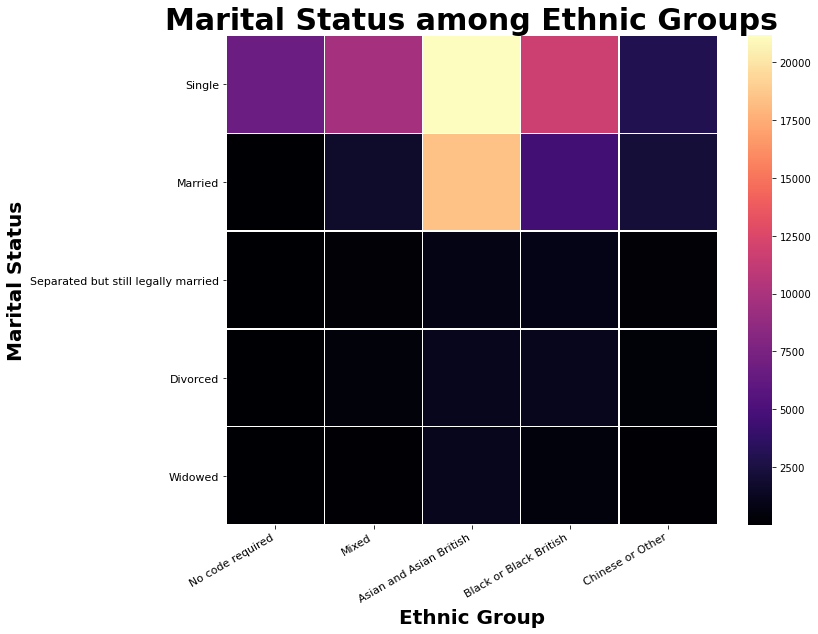

In [10]:
plt.figure(figsize=(11, 9))

ax = sns.heatmap(table, cmap='magma', linecolor='white', linewidth=0.2)

ax.set_xlabel('Ethnic Group', size=20, fontweight='bold')
ax.set_ylabel('Marital Status', size=20, fontweight='bold')
ax.set_title('Marital Status among Ethnic Groups', size=30, fontweight='bold')


# ax.set_xticklabels(('North East', 'North West', 'Yorkshire and the Humber',
#                    'East Midlands', 'West Midlands', 'East of England', 'London',
#                    'South East', 'South West', 'Wales'))

# ax.set_yticklabels(('Agriculture, forestry and fishing', 'Mining and quarrying',
#                    'Construction', 'Wholesale and retail trade', 'Accommodation and food service',
#                    'Transport and storage', 'Financial and insurance', 'Real estate',
#                    'Public administration and defence', 'Education', 'Human health and social work',
#                    'Other community, social and personal service'))

plt.setp(ax.get_yticklabels(), rotation=0, size=11)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', size=11)


# plt.savefig('MSinEthGrp_wexcl.jpeg')